# **Welcome To the Notebook** 


### **Task 1 - Loading our data**

Installing the pyspark using pip

In [1]:
!pip install pyspark

Importing Modules

In [2]:
# importing spark session
from pyspark.sql import SparkSession

# data visualization modules
import matplotlib.pyplot as plt
import plotly.express as px 
import seaborn as sns

# pandas module 
import pandas as pd

# pyspark SQL functions 
from pyspark.sql.functions import col, when, count, udf

# pyspark data preprocessing modules
from pyspark.ml.feature import Imputer, StringIndexer, VectorAssembler, StandardScaler, OneHotEncoder

# pyspark data modeling and model evaluation modules
from pyspark.ml.classification import DecisionTreeClassifier
from pyspark.ml.evaluation import BinaryClassificationEvaluator


Building our Spark Session

In [3]:
spark = SparkSession.builder.appName("Customer_Churn_Prediction").getOrCreate()
spark

25/02/22 21:39:52 WARN Utils: Your hostname, Syukris-MacBook-Air.local resolves to a loopback address: 127.0.0.1; using 192.168.0.188 instead (on interface en0)
25/02/22 21:39:52 WARN Utils: Set SPARK_LOCAL_IP if you need to bind to another address
Setting default log level to "WARN".
To adjust logging level use sc.setLogLevel(newLevel). For SparkR, use setLogLevel(newLevel).
25/02/22 21:39:53 WARN NativeCodeLoader: Unable to load native-hadoop library for your platform... using builtin-java classes where applicable


Loading our data

In [4]:
# Load the CSV dataset
file_path = '/Users/syukrifadzil/Desktop/pythonProject_coursera/Machine Learning with PySpark/dataset.csv'
data = spark.read.csv(file_path, header=True, inferSchema=True)

# Show the first few rows
data.show(5)

+----------+------+-------------+-------+----------+------+------------+----------------+---------------+--------------+------------+----------------+-----------+-----------+---------------+--------------+----------------+--------------------+--------------+------------+-----+
|customerID|gender|SeniorCitizen|Partner|Dependents|tenure|PhoneService|   MultipleLines|InternetService|OnlineSecurity|OnlineBackup|DeviceProtection|TechSupport|StreamingTV|StreamingMovies|      Contract|PaperlessBilling|       PaymentMethod|MonthlyCharges|TotalCharges|Churn|
+----------+------+-------------+-------+----------+------+------------+----------------+---------------+--------------+------------+----------------+-----------+-----------+---------------+--------------+----------------+--------------------+--------------+------------+-----+
|7590-VHVEG|Female|           No|    Yes|        No|     1|          No|No phone service|            DSL|            No|         Yes|              No|         No|    

Print the data schema to check out the data types

In [5]:
data.printSchema()

root
 |-- customerID: string (nullable = true)
 |-- gender: string (nullable = true)
 |-- SeniorCitizen: string (nullable = true)
 |-- Partner: string (nullable = true)
 |-- Dependents: string (nullable = true)
 |-- tenure: integer (nullable = true)
 |-- PhoneService: string (nullable = true)
 |-- MultipleLines: string (nullable = true)
 |-- InternetService: string (nullable = true)
 |-- OnlineSecurity: string (nullable = true)
 |-- OnlineBackup: string (nullable = true)
 |-- DeviceProtection: string (nullable = true)
 |-- TechSupport: string (nullable = true)
 |-- StreamingTV: string (nullable = true)
 |-- StreamingMovies: string (nullable = true)
 |-- Contract: string (nullable = true)
 |-- PaperlessBilling: string (nullable = true)
 |-- PaymentMethod: string (nullable = true)
 |-- MonthlyCharges: double (nullable = true)
 |-- TotalCharges: double (nullable = true)
 |-- Churn: string (nullable = true)



Get the data dimension 

In [6]:
# Number of rows
num_rows = data.count()

# Number of columns
num_cols = len(data.columns)

print(num_rows, num_cols)

7043 21


### **Task 2 - Exploratory Data Analysis**
- Distribution Analysis
- Correlation Analysis 
- Univariate Analysis 
- Finding Missing values

Let's define some lists to store different column names with different data types.

In [7]:
# Create lists for each columns
numerical_cols = [name for name ,typ in data.dtypes if typ=="double" or typ=="int"]
categorical_col = [name for name ,typ in data.dtypes if typ=="string"]


Let's get all the numerical features and store them into a pandas dataframe.

In [8]:
# Convert to PandasDataFrame
df = data.select(numerical_cols).toPandas()

# Show results
df.head()

,tenure,MonthlyCharges,TotalCharges
0,1,29.85,29.85
1,34,56.95,1889.50
2,2,53.85,108.15
3,45,42.30,1840.75
4,2,70.70,151.65


Let's create histograms to analyse the distribution of our numerical columns. 

/var/folders/wv/7ncgjs9n24g8j548tlc78zfm0000gn/T/ipykernel_16709/974157766.py:4: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared.
  df.hist(ax=ax, bins=20, edgecolor="black")


array([[<Axes: title={'center': 'tenure'}>,
        <Axes: title={'center': 'MonthlyCharges'}>],
       [<Axes: title={'center': 'TotalCharges'}>, <Axes: >]], dtype=object)

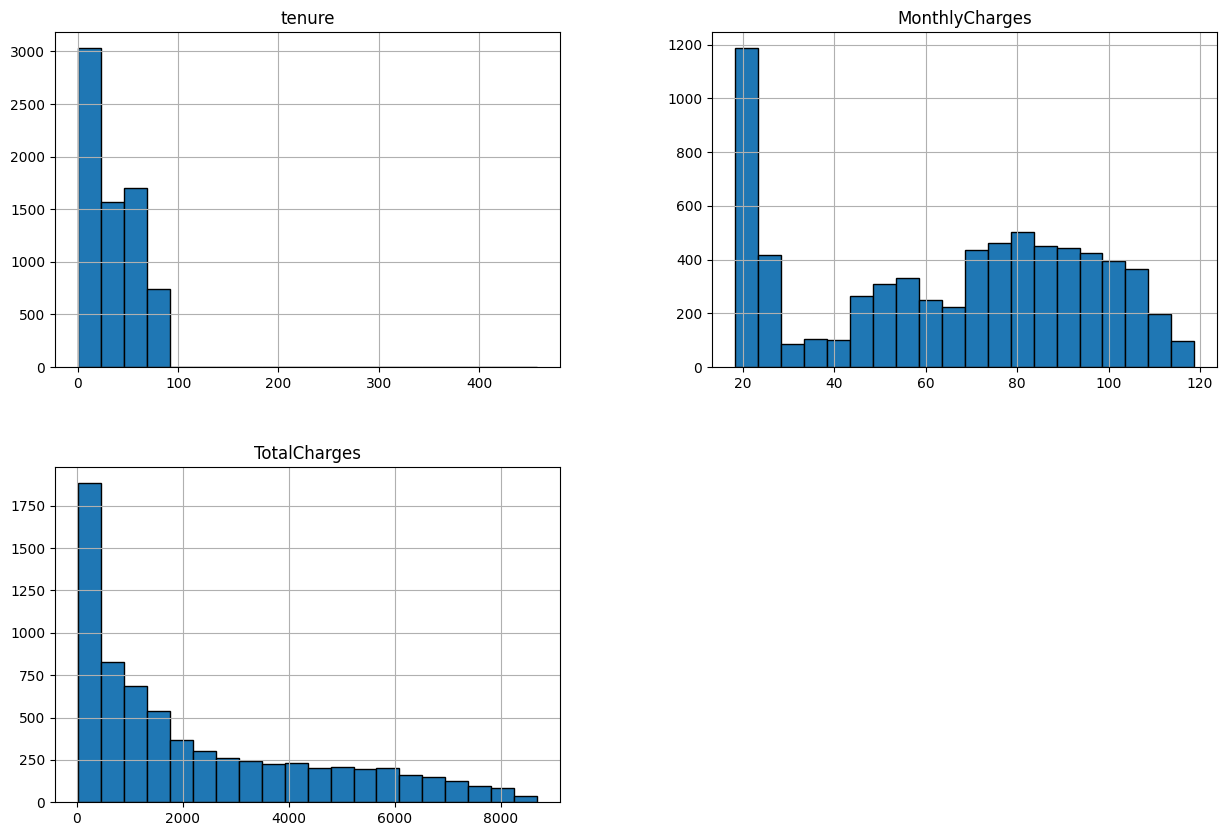

In [9]:
# Create a histogram
fig = plt.figure(figsize=(15,10))
ax = fig.gca()
df.hist(ax=ax, bins=20, edgecolor="black")

Let's generate the correlation matrix 

In [10]:
df.corr()

,tenure,MonthlyCharges,TotalCharges
tenure,1.000000,0.243703,0.806530
MonthlyCharges,0.243703,1.000000,0.651065
TotalCharges,0.806530,0.651065,1.000000


Let's check the unique value count per each categorical variables

In [11]:
# Check all the unique values in each categorical columns
for columns in categorical_col:
    data.groupby(columns).count().show()

+----------+-----+
|customerID|count|
+----------+-----+
|3668-QPYBK|    1|
|6234-RAAPL|    1|
|1894-IGFSG|    1|
|6982-SSHFK|    1|
|5859-HZYLF|    1|
|6479-OAUSD|    1|
|2592-YKDIF|    1|
|6718-BDGHG|    1|
|3195-TQDZX|    1|
|4248-QPAVC|    1|
|5668-MEISB|    1|
|5802-ADBRC|    1|
|2712-SYWAY|    1|
|2011-TRQYE|    1|
|7244-KXYZN|    1|
|0953-LGOVU|    1|
|3623-FQBOX|    1|
|3692-JHONH|    1|
|3528-HFRIQ|    1|
|7661-CPURM|    1|
+----------+-----+
only showing top 20 rows

CodeCache: size=131072Kb used=23965Kb max_used=23981Kb free=107106Kb
 bounds [0x00000001081f8000, 0x0000000109988000, 0x00000001101f8000]
 total_blobs=9487 nmethods=8542 adapters=856
 compilation: disabled (not enough contiguous free space left)
+------+-----+
|gender|count|
+------+-----+
|Female| 3488|
|  Male| 3555|
+------+-----+



Java HotSpot(TM) 64-Bit Server VM warning: CodeCache is full. Compiler has been disabled.
Java HotSpot(TM) 64-Bit Server VM warning: Try increasing the code cache size using -XX:ReservedCodeCacheSize=


+-------------+-----+
|SeniorCitizen|count|
+-------------+-----+
|           No| 5901|
|          Yes| 1142|
+-------------+-----+

+-------+-----+
|Partner|count|
+-------+-----+
|     No| 3641|
|    Yes| 3402|
+-------+-----+

+----------+-----+
|Dependents|count|
+----------+-----+
|        No| 4933|
|       Yes| 2110|
+----------+-----+

+------------+-----+
|PhoneService|count|
+------------+-----+
|          No|  682|
|         Yes| 6361|
+------------+-----+

+----------------+-----+
|   MultipleLines|count|
+----------------+-----+
|No phone service|  682|
|              No| 3390|
|             Yes| 2971|
+----------------+-----+

+---------------+-----+
|InternetService|count|
+---------------+-----+
|    Fiber optic| 3096|
|             No| 1526|
|            DSL| 2421|
+---------------+-----+

+-------------------+-----+
|     OnlineSecurity|count|
+-------------------+-----+
|                 No| 3498|
|                Yes| 2019|
|No internet service| 1526|
+--------------

Let's find number of null values in all of our dataframe columns

In [12]:
# Check the null values for each column in the dataframe
for column in data.columns:
    data.select(count(when(col(column).isNull(), column)).alias(column)).show()

+----------+
|customerID|
+----------+
|         0|
+----------+

+------+
|gender|
+------+
|     0|
+------+

+-------------+
|SeniorCitizen|
+-------------+
|            0|
+-------------+

+-------+
|Partner|
+-------+
|      0|
+-------+

+----------+
|Dependents|
+----------+
|         0|
+----------+

+------+
|tenure|
+------+
|     0|
+------+

+------------+
|PhoneService|
+------------+
|           0|
+------------+

+-------------+
|MultipleLines|
+-------------+
|            0|
+-------------+

+---------------+
|InternetService|
+---------------+
|              0|
+---------------+

+--------------+
|OnlineSecurity|
+--------------+
|             0|
+--------------+

+------------+
|OnlineBackup|
+------------+
|           0|
+------------+

+----------------+
|DeviceProtection|
+----------------+
|               0|
+----------------+

+-----------+
|TechSupport|
+-----------+
|          0|
+-----------+

+-----------+
|StreamingTV|
+-----------+
|          0|
+----------

### **Task 3 - Data Preprocessing**
- Handling the missing values
- Removing the outliers

**Handling the missing values** <br>
Let's create a list of column names with missing values

In [13]:
# Create a list based on the column with missing values
col_with_missing_values = ["TotalCharges"]

Creating our Imputer

In [14]:
# Create Imputer model
imputer = Imputer(inputCols=col_with_missing_values, outputCols=col_with_missing_values).setStrategy("mean")

Use Imputer to fill the missing values

In [15]:
# Using Imputer model, fill in the missing values in the TotalCharges column
imputer = imputer.fit(data)
data = imputer.transform(data)

Let's check the missing value counts again

In [16]:
# Check the missing values count in the column
data.select(count(when(col("TotalCharges").isNull(), "TotalCharges")).alias("TotalCharges")).show()

+------------+
|TotalCharges|
+------------+
|           0|
+------------+



**Removing the outliers** <br>
Let's find the customer with the tenure higher than 100 

In [17]:
# Find customers that have tenure more than 100
data.select("*").where(data.tenure > 100).show()

+----------+------+-------------+-------+----------+------+------------+-------------+---------------+--------------+------------+----------------+-----------+-----------+---------------+--------------+----------------+----------------+--------------+------------+-----+
|customerID|gender|SeniorCitizen|Partner|Dependents|tenure|PhoneService|MultipleLines|InternetService|OnlineSecurity|OnlineBackup|DeviceProtection|TechSupport|StreamingTV|StreamingMovies|      Contract|PaperlessBilling|   PaymentMethod|MonthlyCharges|TotalCharges|Churn|
+----------+------+-------------+-------+----------+------+------------+-------------+---------------+--------------+------------+----------------+-----------+-----------+---------------+--------------+----------------+----------------+--------------+------------+-----+
|5122-CYFXA|Female|           No|     No|        No|   458|         Yes|           No|            DSL|            No|         Yes|              No|        Yes|        Yes|            Yes|

Let's drop the outlier row

In [18]:
# Show number of rows before removing outlier
print("Before removing outlier: ", data.count())

# Remove outlier
data = data.filter(data.tenure < 100)

# Show number of rows after removing outlier
print("After removing outlier: ", data.count())

Before removing outlier:  7043
After removing outlier:  7042


### **Task 4 - Feature Preparation**
- Numerical Features 
    - Vector Assembling
    - Numerical Scaling
- Categorical Features
    - String Indexing
    - Vector Assembling

- Combining the numerical and categorical feature vectors




**Feature Preparation - Numerical Features** <br>

`Vector Assembling --> Standard Scaling` <br>

**Vector Assembling** <br>
To apply our machine learning model we need to combine all of our numerical and categorical features into vectors. For now let's create a feature vector for our numerical columns.


In [19]:
# Create VectorAssembler model
numerical_vector = VectorAssembler(inputCols=numerical_cols, outputCol="numerical_feat_vector")
data = numerical_vector.transform(data)
data.show()

+----------+------+-------------+-------+----------+------+------------+----------------+---------------+-------------------+-------------------+-------------------+-------------------+-------------------+-------------------+--------------+----------------+--------------------+--------------+------------+-----+---------------------+
|customerID|gender|SeniorCitizen|Partner|Dependents|tenure|PhoneService|   MultipleLines|InternetService|     OnlineSecurity|       OnlineBackup|   DeviceProtection|        TechSupport|        StreamingTV|    StreamingMovies|      Contract|PaperlessBilling|       PaymentMethod|MonthlyCharges|TotalCharges|Churn|numerical_feat_vector|
+----------+------+-------------+-------+----------+------+------------+----------------+---------------+-------------------+-------------------+-------------------+-------------------+-------------------+-------------------+--------------+----------------+--------------------+--------------+------------+-----+------------------

**Numerical Scaling** <br>
Let's standardize all of our numerical features. 

In [20]:
# Create StandardScaler model
scaler = StandardScaler(inputCol="numerical_feat_vector",
                        outputCol="numerical_feat_scaled", withStd=True, withMean=True)
data = scaler.fit(data).transform(data)

# Show results
data.show()

+----------+------+-------------+-------+----------+------+------------+----------------+---------------+-------------------+-------------------+-------------------+-------------------+-------------------+-------------------+--------------+----------------+--------------------+--------------+------------+-----+---------------------+---------------------+
|customerID|gender|SeniorCitizen|Partner|Dependents|tenure|PhoneService|   MultipleLines|InternetService|     OnlineSecurity|       OnlineBackup|   DeviceProtection|        TechSupport|        StreamingTV|    StreamingMovies|      Contract|PaperlessBilling|       PaymentMethod|MonthlyCharges|TotalCharges|Churn|numerical_feat_vector|numerical_feat_scaled|
+----------+------+-------------+-------+----------+------+------------+----------------+---------------+-------------------+-------------------+-------------------+-------------------+-------------------+-------------------+--------------+----------------+--------------------+--------

**Feature Preperation - Categorical Features** <br>

`String Indexing --> Vector Assembling` <br>

**String Indexing** <br>
We need to convert all the string columns to numeric columns.

In [21]:
# Make list to indexed name in categorical columns
categorical_col_indexed = [name + "_indexed" for name in categorical_col]

# Convert the string to numeric
indexer = StringIndexer(inputCols=categorical_col, outputCols=categorical_col_indexed)
data = indexer.fit(data).transform(data)

# Show results
data.show()

25/02/22 21:40:08 WARN SparkStringUtils: Truncated the string representation of a plan since it was too large. This behavior can be adjusted by setting 'spark.sql.debug.maxToStringFields'.


+----------+------+-------------+-------+----------+------+------------+----------------+---------------+-------------------+-------------------+-------------------+-------------------+-------------------+-------------------+--------------+----------------+--------------------+--------------+------------+-----+---------------------+---------------------+------------------+--------------+---------------------+---------------+------------------+--------------------+---------------------+-----------------------+----------------------+--------------------+------------------------+-------------------+-------------------+-----------------------+----------------+------------------------+---------------------+-------------+
|customerID|gender|SeniorCitizen|Partner|Dependents|tenure|PhoneService|   MultipleLines|InternetService|     OnlineSecurity|       OnlineBackup|   DeviceProtection|        TechSupport|        StreamingTV|    StreamingMovies|      Contract|PaperlessBilling|       PaymentMet

Let's combine all of our categorifal features in to one feature vector.

In [23]:
# Remove unnecessary indexed
categorical_col_indexed.remove("customerID_indexed")
categorical_col_indexed.remove("Churn_indexed")

# Combine both columns
categorical_vector_assembler = VectorAssembler(inputCols=categorical_col_indexed, outputCol="categorical_feat_vector")
data = categorical_vector_assembler.transform(data)

# Show results
data.show()

+----------+------+-------------+-------+----------+------+------------+----------------+---------------+-------------------+-------------------+-------------------+-------------------+-------------------+-------------------+--------------+----------------+--------------------+--------------+------------+-----+---------------------+---------------------+------------------+--------------+---------------------+---------------+------------------+--------------------+---------------------+-----------------------+----------------------+--------------------+------------------------+-------------------+-------------------+-----------------------+----------------+------------------------+---------------------+-------------+-----------------------+
|customerID|gender|SeniorCitizen|Partner|Dependents|tenure|PhoneService|   MultipleLines|InternetService|     OnlineSecurity|       OnlineBackup|   DeviceProtection|        TechSupport|        StreamingTV|    StreamingMovies|      Contract|PaperlessB

Now let's combine categorical and numerical feature vectors.

In [25]:
# Create final vector
final_vector_assembler = VectorAssembler(inputCols=["categorical_feat_vector", "numerical_feat_scaled"], outputCol="final_feat_vector")
data = final_vector_assembler.transform(data)

# Show results
data.select(["final_feat_vector", "Churn_indexed"]).show()

+--------------------+-------------+
|   final_feat_vector|Churn_indexed|
+--------------------+-------------+
|(19,[0,2,4,5,6,8,...|          0.0|
|(19,[6,7,9,13,14,...|          0.0|
|(19,[6,7,8,15,16,...|          1.0|
|[0.0,0.0,0.0,0.0,...|          0.0|
|(19,[0,16,17,18],...|          1.0|
|(19,[0,5,9,11,12,...|          1.0|
|(19,[3,5,8,11,15,...|          0.0|
|(19,[0,4,5,6,7,14...|          0.0|
|(19,[0,2,5,9,10,1...|          1.0|
|(19,[3,6,7,8,13,1...|          0.0|
|(19,[2,3,6,7,15,1...|          0.0|
|[0.0,0.0,0.0,0.0,...|          0.0|
|(19,[2,5,9,11,12,...|          0.0|
|(19,[5,8,9,11,12,...|          1.0|
|(19,[7,9,10,11,12...|          0.0|
|[1.0,0.0,1.0,1.0,...|          0.0|
|[1.0,0.0,0.0,0.0,...|          0.0|
|[0.0,0.0,0.0,1.0,...|          0.0|
|(19,[0,2,3,6,9,10...|          1.0|
|(19,[0,8,9,12,16,...|          0.0|
+--------------------+-------------+
only showing top 20 rows



### **Task 5 - Model Training**
- Train and Test data splitting 
- Creating our model 
- Training our model 
- Make initial predictions using our model

In this task, we are going to start training our model

In [27]:
# Create train and test sets
train, test = data.randomSplit([0.7, 0.3], seed=100)

# Show numbers of train and test sets
print(train.count())
print(test.count())

4930
2112


Now let's create and train our desicion tree

In [28]:
# Create Decision Tree model
dt = DecisionTreeClassifier(featuresCol="final_feat_vector", labelCol="Churn_indexed", maxDepth=3)
model = dt.fit(train)

Let's make predictions on our test data

In [29]:
# Make a prediction for test sets
predictions_test = model.transform(test)
predictions_test.select(["Churn", "prediction"]).show()

+-----+----------+
|Churn|prediction|
+-----+----------+
|  Yes|       1.0|
|   No|       0.0|
|   No|       0.0|
|   No|       0.0|
|   No|       0.0|
|  Yes|       0.0|
|   No|       0.0|
|  Yes|       0.0|
|   No|       0.0|
|   No|       0.0|
|   No|       0.0|
|   No|       0.0|
|   No|       0.0|
|  Yes|       0.0|
|   No|       0.0|
|   No|       0.0|
|   No|       0.0|
|   No|       0.0|
|   No|       0.0|
|   No|       0.0|
+-----+----------+
only showing top 20 rows



### **Task 6 - Model Evaluation**
- Calculating area under the ROC curve for the `test` set 
- Calculating area under the ROC curve for the `training` set 
- Hyper parameter tuning

In [30]:
# Make a model for BinaryClassificationEvaluator
evaluator = BinaryClassificationEvaluator(labelCol="Churn_indexed")

# Evaluate AUC for test sets
auc_test = evaluator.evaluate(predictions_test, {evaluator.metricName:"areaUnderROC"})
auc_test

0.7678230877272001

Let's get the AUC for our `training` set

In [31]:
# Make prediction for train sets
predictions_train = model.transform(train)

# Evaluate AUC for train sets
auc_train = evaluator.evaluate(predictions_train, {evaluator.metricName:"areaUnderROC"})
auc_train

0.7721112330375414

**Hyper parameter tuning**

Let's find the best `maxDepth` parameter for our DT model. 

In [38]:
def evaluate_dt(mode_params):
      test_accuracies = []
      train_accuracies = []

      for maxD in mode_params:
        # train the model based on the maxD
        decision_tree = DecisionTreeClassifier(featuresCol = 'final_feat_vector', labelCol = 'Churn_indexed', maxDepth = maxD)
        dtModel = decision_tree.fit(train)

        # calculating test error 
        predictions_test = dtModel.transform(test)
        evaluator = BinaryClassificationEvaluator(labelCol="Churn_indexed")
        auc_test = evaluator.evaluate(predictions_test, {evaluator.metricName: "areaUnderROC"})
        # recording the accuracy 
        test_accuracies.append(auc_test)

        # calculating training error
        predictions_training = dtModel.transform(train)
        evaluator = BinaryClassificationEvaluator(labelCol="Churn_indexed")
        auc_training = evaluator.evaluate(predictions_training, {evaluator.metricName: "areaUnderROC"})
        train_accuracies.append(auc_training)

      return(test_accuracies, train_accuracies)  

Let's define `params` list to evaluate our model iteratively with differe maxDepth parameter.  

In [39]:
# Define params
maxDepths = [2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20]
test_accs, train_accs = evaluate_dt(maxDepths)

# Show results
print(train_accs)
print(test_accs)

[0.7737711024910238, 0.7721112330375414, 0.6732017750857608, 0.5647403286677019, 0.797607974377661, 0.7600331160893413, 0.7616399322585649, 0.7851198149534798, 0.82591977092655, 0.8633625692715379, 0.8899907318309699, 0.9236516335825413, 0.9402616892332477, 0.9521037242780167, 0.9662424766482165, 0.9763120733848871, 0.9807472862567603, 0.9853808496196841, 0.9883361989750398]
[0.7918744332963926, 0.7678230877272001, 0.6938514510575503, 0.5664944085244075, 0.7968240892739675, 0.7464077658395512, 0.7486976928866473, 0.7390283218461648, 0.7568262227463716, 0.7717528253693575, 0.770466222983424, 0.7493673661690539, 0.7371905724224987, 0.7208594338001293, 0.7102797812005524, 0.704298946894316, 0.7036452746549405, 0.6956814962753128, 0.6895714683623821]


Let's visualize our results

In [43]:
# Convert to Pandas DataFrame
df = pd.DataFrame()
df["maxDepth"] = maxDepths
df["trainAcc"] = train_accs
df["testAcc"] = test_accs

# Visualize the results above
px.line(df, x="maxDepth", y=["trainAcc", "testAcc"])

ValueError: Mime type rendering requires nbformat>=4.2.0 but it is not installed

Figure({
    'data': [{'hovertemplate': 'variable=trainAcc<br>maxDepth=%{x}<br>value=%{y}<extra></extra>',
              'legendgroup': 'trainAcc',
              'line': {'color': '#636efa', 'dash': 'solid'},
              'marker': {'symbol': 'circle'},
              'mode': 'lines',
              'name': 'trainAcc',
              'orientation': 'v',
              'showlegend': True,
              'type': 'scatter',
              'x': {'bdata': 'AgMEBQYHCAkKCwwNDg8QERITFA==', 'dtype': 'i1'},
              'xaxis': 'x',
              'y': {'bdata': ('8T15nbvC6D+7p9idIrXoP5pH83Leiu' ... 'MiSGLvP2AUZ2s9iO8/s5+BPHOg7z8='),
                    'dtype': 'f8'},
              'yaxis': 'y'},
             {'hovertemplate': 'variable=testAcc<br>maxDepth=%{x}<br>value=%{y}<extra></extra>',
              'legendgroup': 'testAcc',
              'line': {'color': '#EF553B', 'dash': 'solid'},
              'marker': {'symbol': 'circle'},
              'mode': 'lines',
              'name': 'testAcc',
              'orientation': 'v',
              'showlegend': True,
              'type': 'scatter',
              'x': {'bdata': 'AgMEBQYHCAkKCwwNDg8QERITFA==', 'dtype': 'i1'},
              'xaxis': 'x',
              'y': {'bdata': ('QX0xDQlX6T+03Vy5AZLoP9tgUvUHNO' ... 'QYQ4TmPwDqXdcFQ+Y/TOAbL/gQ5j8='),
                    'dtype': 'f8'},
              'yaxis': 'y'}],
    'layout': {'legend': {'title': {'text': 'variable'}, 'tracegroupgap': 0},
               'margin': {'t': 60},
               'template': '...',
               'xaxis': {'anchor': 'y', 'domain': [0.0, 1.0], 'title': {'text': 'maxDepth'}},
               'yaxis': {'anchor': 'x', 'domain': [0.0, 1.0], 'title': {'text': 'value'}}}
})

### **7 - Model Deployment**
- Giving Recommendations using our model 



We were asked to recommend a solution to reduce the customer churn. 


In [45]:
# Create a model for feature importances
feature_importance = model.featureImportances
scores = [score for i, score in enumerate(feature_importance)]

# Convert to Pandas DataFrame
df = pd.DataFrame(scores, columns=["score"], index=categorical_col_indexed + numerical_cols)

# Show results
df

# Visualize results
px.bar(df, y="score")

ValueError: Mime type rendering requires nbformat>=4.2.0 but it is not installed

Figure({
    'data': [{'hovertemplate': 'index=%{x}<br>score=%{y}<extra></extra>',
              'legendgroup': '',
              'marker': {'color': '#636efa', 'pattern': {'shape': ''}},
              'name': '',
              'orientation': 'v',
              'showlegend': False,
              'textposition': 'auto',
              'type': 'bar',
              'x': array(['gender_indexed', 'SeniorCitizen_indexed', 'Partner_indexed',
                          'Dependents_indexed', 'PhoneService_indexed', 'MultipleLines_indexed',
                          'InternetService_indexed', 'OnlineSecurity_indexed',
                          'OnlineBackup_indexed', 'DeviceProtection_indexed',
                          'TechSupport_indexed', 'StreamingTV_indexed', 'StreamingMovies_indexed',
                          'Contract_indexed', 'PaperlessBilling_indexed', 'PaymentMethod_indexed',
                          'tenure', 'MonthlyCharges', 'TotalCharges'], dtype=object),
              'xaxis': 'x',
              'y': {'bdata': ('AAAAAAAAAAAAAAAAAAAAAAAAAAAAAA' ... 'tKxz/CPwAAAAAAAAAAAAAAAAAAAAA='),
                    'dtype': 'f8'},
              'yaxis': 'y'}],
    'layout': {'barmode': 'relative',
               'legend': {'tracegroupgap': 0},
               'margin': {'t': 60},
               'template': '...',
               'xaxis': {'anchor': 'y', 'domain': [0.0, 1.0], 'title': {'text': 'index'}},
               'yaxis': {'anchor': 'x', 'domain': [0.0, 1.0], 'title': {'text': 'score'}}}
})

Let's create a bar chart to visualize the customer churn per contract type

In [46]:
# Create a dataframe and group it
df = data.groupby(["Contract", "Churn"]).count().toPandas()

# Visualize the results
px.bar(df, x="Contract", y="count", color="Churn")

ValueError: Mime type rendering requires nbformat>=4.2.0 but it is not installed

Figure({
    'data': [{'hovertemplate': 'Churn=No<br>Contract=%{x}<br>count=%{y}<extra></extra>',
              'legendgroup': 'No',
              'marker': {'color': '#636efa', 'pattern': {'shape': ''}},
              'name': 'No',
              'orientation': 'v',
              'showlegend': True,
              'textposition': 'auto',
              'type': 'bar',
              'x': array(['Month-to-month', 'One year', 'Two year'], dtype=object),
              'xaxis': 'x',
              'y': {'bdata': 'qwgbBW8G', 'dtype': 'i2'},
              'yaxis': 'y'},
             {'hovertemplate': 'Churn=Yes<br>Contract=%{x}<br>count=%{y}<extra></extra>',
              'legendgroup': 'Yes',
              'marker': {'color': '#EF553B', 'pattern': {'shape': ''}},
              'name': 'Yes',
              'orientation': 'v',
              'showlegend': True,
              'textposition': 'auto',
              'type': 'bar',
              'x': array(['Month-to-month', 'Two year', 'One year'], dtype=object),
              'xaxis': 'x',
              'y': {'bdata': 'dwYwAKYA', 'dtype': 'i2'},
              'yaxis': 'y'}],
    'layout': {'barmode': 'relative',
               'legend': {'title': {'text': 'Churn'}, 'tracegroupgap': 0},
               'margin': {'t': 60},
               'template': '...',
               'xaxis': {'anchor': 'y', 'domain': [0.0, 1.0], 'title': {'text': 'Contract'}},
               'yaxis': {'anchor': 'x', 'domain': [0.0, 1.0], 'title': {'text': 'count'}}}
})

The bar chart displays the number of churned customers based on their contract type. It is evident that customers with a "Month-to-month" contract have a higher churn rate compared to those with "One year" or "Two year" contracts. As a recommendation, the telecommunication company could consider offering incentives or discounts to encourage customers with month-to-month contracts to switch to longer-term contracts. 